In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

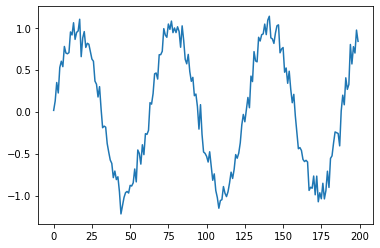

In [31]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

plt.plot(series)
plt.show()

In [32]:
T = 10
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t + T]
    X.append(x)
    y = series[t + T]
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape:", X.shape, "Y.shape:", Y.shape)

X.shape: (190, 10) Y.shape: (190,)


In [33]:
i = Input(shape=(T,))
x = Dense(units=1)(i)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(lr=0.1),
              loss=tf.keras.losses.mean_squared_error)

r = model.fit(x=X[:-N//2], y=Y[:-N//2], 
          epochs=80, validation_data=(X[-N//2:], Y[-N//2:]), 
          use_multiprocessing=True)

Epoch 1/80
3/3 [==============================] - 0s 62ms/step - loss: 0.4782 - val_loss: 0.3084
Epoch 2/80
3/3 [==============================] - 0s 19ms/step - loss: 0.2956 - val_loss: 0.1213
Epoch 3/80
3/3 [==============================] - 0s 17ms/step - loss: 0.1345 - val_loss: 0.0665
Epoch 4/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0554 - val_loss: 0.1067
Epoch 5/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0833 - val_loss: 0.0559
Epoch 6/80
3/3 [==============================] - 0s 15ms/step - loss: 0.0447 - val_loss: 0.0696
Epoch 7/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0652 - val_loss: 0.0554
Epoch 8/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0436 - val_loss: 0.0518
Epoch 9/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0470 - val_loss: 0.0320
Epoch 10/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0233 - val_loss: 0.0323
Epoch 11/80
3/3 [============

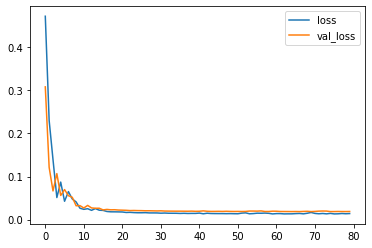

In [34]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [35]:
# the one step prediction, the wrong way

validation_target = Y[-N//2:]
validation_prediction = []

i = -N//2

while len(validation_prediction) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0, 0]
    i += 1

    validation_prediction.append(p)

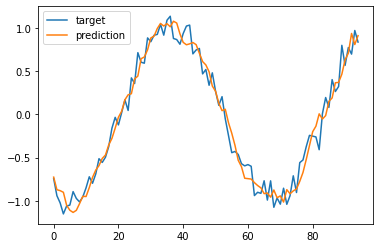

In [36]:
plt.plot(validation_target, label="target")
plt.plot(validation_prediction, label="prediction")
plt.legend()
plt.show()

In [37]:
# multistep prediction

validation_target = Y[-N//2:]
validation_prediction = []

last_x = X[-N//2]

while len(validation_prediction) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0, 0]
    validation_prediction.append(p)

    last_x = np.roll(last_x, -1)
    last_x[-1] = p

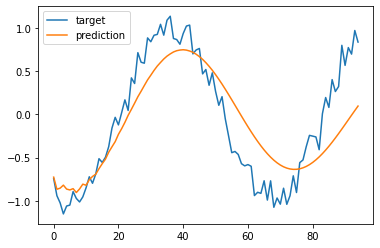

In [38]:
plt.plot(validation_target, label="target")
plt.plot(validation_prediction, label="prediction")
plt.legend()
plt.show()